In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
%matplotlib inline


In [2]:
chronic_disease_file = "Resources/U.S._Chronic_Disease_Indicators.csv"
econ_df = pd.read_csv(r"Resources/income_data.csv")
econ_df.head()
cdc_data = pd.read_csv(chronic_disease_file)
cdc_data.head()

,YearEnd,LocationAbbr,LocationDesc,Topic,Question,Response,DataValueUnit,DataValueType,DataValue,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation
0,2015,AK,Alaska,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,22,NaN,19.7,24.5,Overall,Overall,"(64.84507995700051, -147.72205903599973)"
1,2015,AL,Alabama,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,30.7,NaN,27.3,34.3,Overall,Overall,"(32.84057112200048, -86.63186076199969)"
2,2015,AR,Arkansas,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,27.6,NaN,24.5,30.8,Overall,Overall,"(34.74865012400045, -92.27449074299966)"
3,2015,AZ,Arizona,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,34.8,NaN,29.7,40.2,Overall,Overall,"(34.865970280000454, -111.76381127699972)"
4,2015,CA,California,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,28.9,NaN,23.6,34.7,Overall,Overall,"(37.63864012300047, -120.99999953799971)"


In [3]:
# identify incomplete rows
cdc_data.count()

YearEnd                    403984
LocationAbbr               403984
LocationDesc               403984
Topic                      403984
Question                   403984
Response                    79323
DataValueUnit              374119
DataValueType              403984
DataValue                  297817
DatavalueFootnote          187853
LowConfidenceLimit         246819
HighConfidenceLimit        246819
StratificationCategory1    403984
Stratification1            403984
GeoLocation                401416
dtype: int64

In [4]:
# Drop all rows with missing information 
cdc_data = cdc_data.dropna(how='any')
cdc_data.count()

YearEnd                    37264
LocationAbbr               37264
LocationDesc               37264
Topic                      37264
Question                   37264
Response                   37264
DataValueUnit              37264
DataValueType              37264
DataValue                  37264
DatavalueFootnote          37264
LowConfidenceLimit         37264
HighConfidenceLimit        37264
StratificationCategory1    37264
Stratification1            37264
GeoLocation                37264
dtype: int64

In [5]:
# find the shapr of dataframe
cdc_data.shape

(37264, 15)

In [6]:
cdc_data.to_csv("Resources/Clean_Chronic.csv")
Clean_data = ("Resources/Clean_Chronic.csv")
Analyzed_data = pd.read_csv(Clean_data)
Analyzed_data.head()

,Unnamed: 0,YearEnd,LocationAbbr,LocationDesc,Topic,Question,Response,DataValueUnit,DataValueType,DataValue,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation
0,41149,2013,UT,Utah,Asthma,Asthma mortality rate,,"cases per 1,000,000",Crude Rate,13.90,,8.50,21.40,Gender,Female,"(39.360700171000474, -111.58713063499971)"
1,68783,2013,AR,Arkansas,Asthma,Hospitalizations for asthma,,"cases per 10,000",Age-adjusted Rate,14.80,,13.66,15.93,Race/Ethnicity,"Black, non-Hispanic","(34.74865012400045, -92.27449074299966)"
2,68784,2013,AR,Arkansas,Asthma,Hospitalizations for asthma,,"cases per 10,000",Age-adjusted Rate,9.48,,9.00,9.96,Gender,Female,"(34.74865012400045, -92.27449074299966)"
3,68785,2013,AR,Arkansas,Asthma,Hospitalizations for asthma,,"cases per 10,000",Age-adjusted Rate,6.06,,4.75,7.37,Race/Ethnicity,Hispanic,"(34.74865012400045, -92.27449074299966)"
4,68786,2013,AR,Arkansas,Asthma,Hospitalizations for asthma,,"cases per 10,000",Age-adjusted Rate,5.42,,5.05,5.80,Gender,Male,"(34.74865012400045, -92.27449074299966)"


studying the data 

# verifying the data content ?

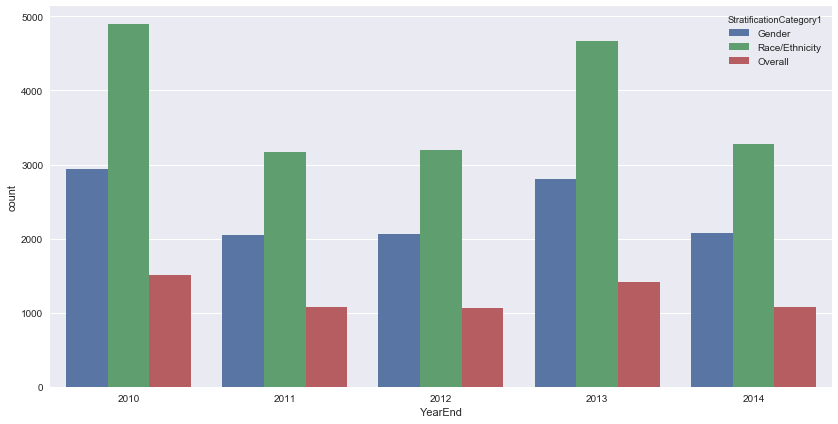

In [7]:
# visualizing the stratification of our data
# sesborn countplot
sns.set(rc={'figure.figsize':(14,7)})
sns.countplot(x='YearEnd', data=Analyzed_data , hue = 'StratificationCategory1')
plt.savefig("Resources/Stratification.png")

# Data is collected over Race, gender and overall. Out of which maximum results were obtained for 'Race'

##What is the overall incidence of chronic disease in the U.S. per year?

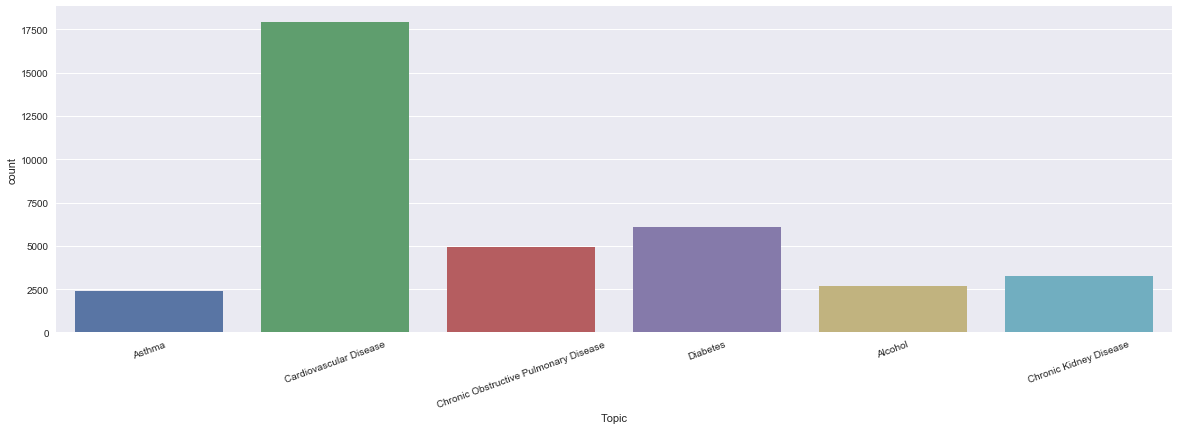

In [8]:
# visualizing topics
sns.set(rc={'figure.figsize':(20,6)})
sns.countplot(x='Topic', data = Analyzed_data)
plt.xticks(rotation = 20)
plt.savefig("Resources/Prevalence.png")

In [9]:
# check how many times each question appear in  dataset 
cdc_data['Question'].value_counts()

Mortality from total cardiovascular diseases                                                              3590
Mortality from diseases of the heart                                                                      3486
Mortality due to diabetes reported as any listed cause of death                                           3322
Mortality from coronary heart disease                                                                     3292
Mortality with end-stage renal disease                                                                    3280
Mortality from heart failure                                                                              3206
Mortality from cerebrovascular disease (stroke)                                                           3040
Mortality with chronic obstructive pulmonary disease as underlying cause among adults aged >= 45 years    2766
Chronic liver disease mortality                                                                           2660
A

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

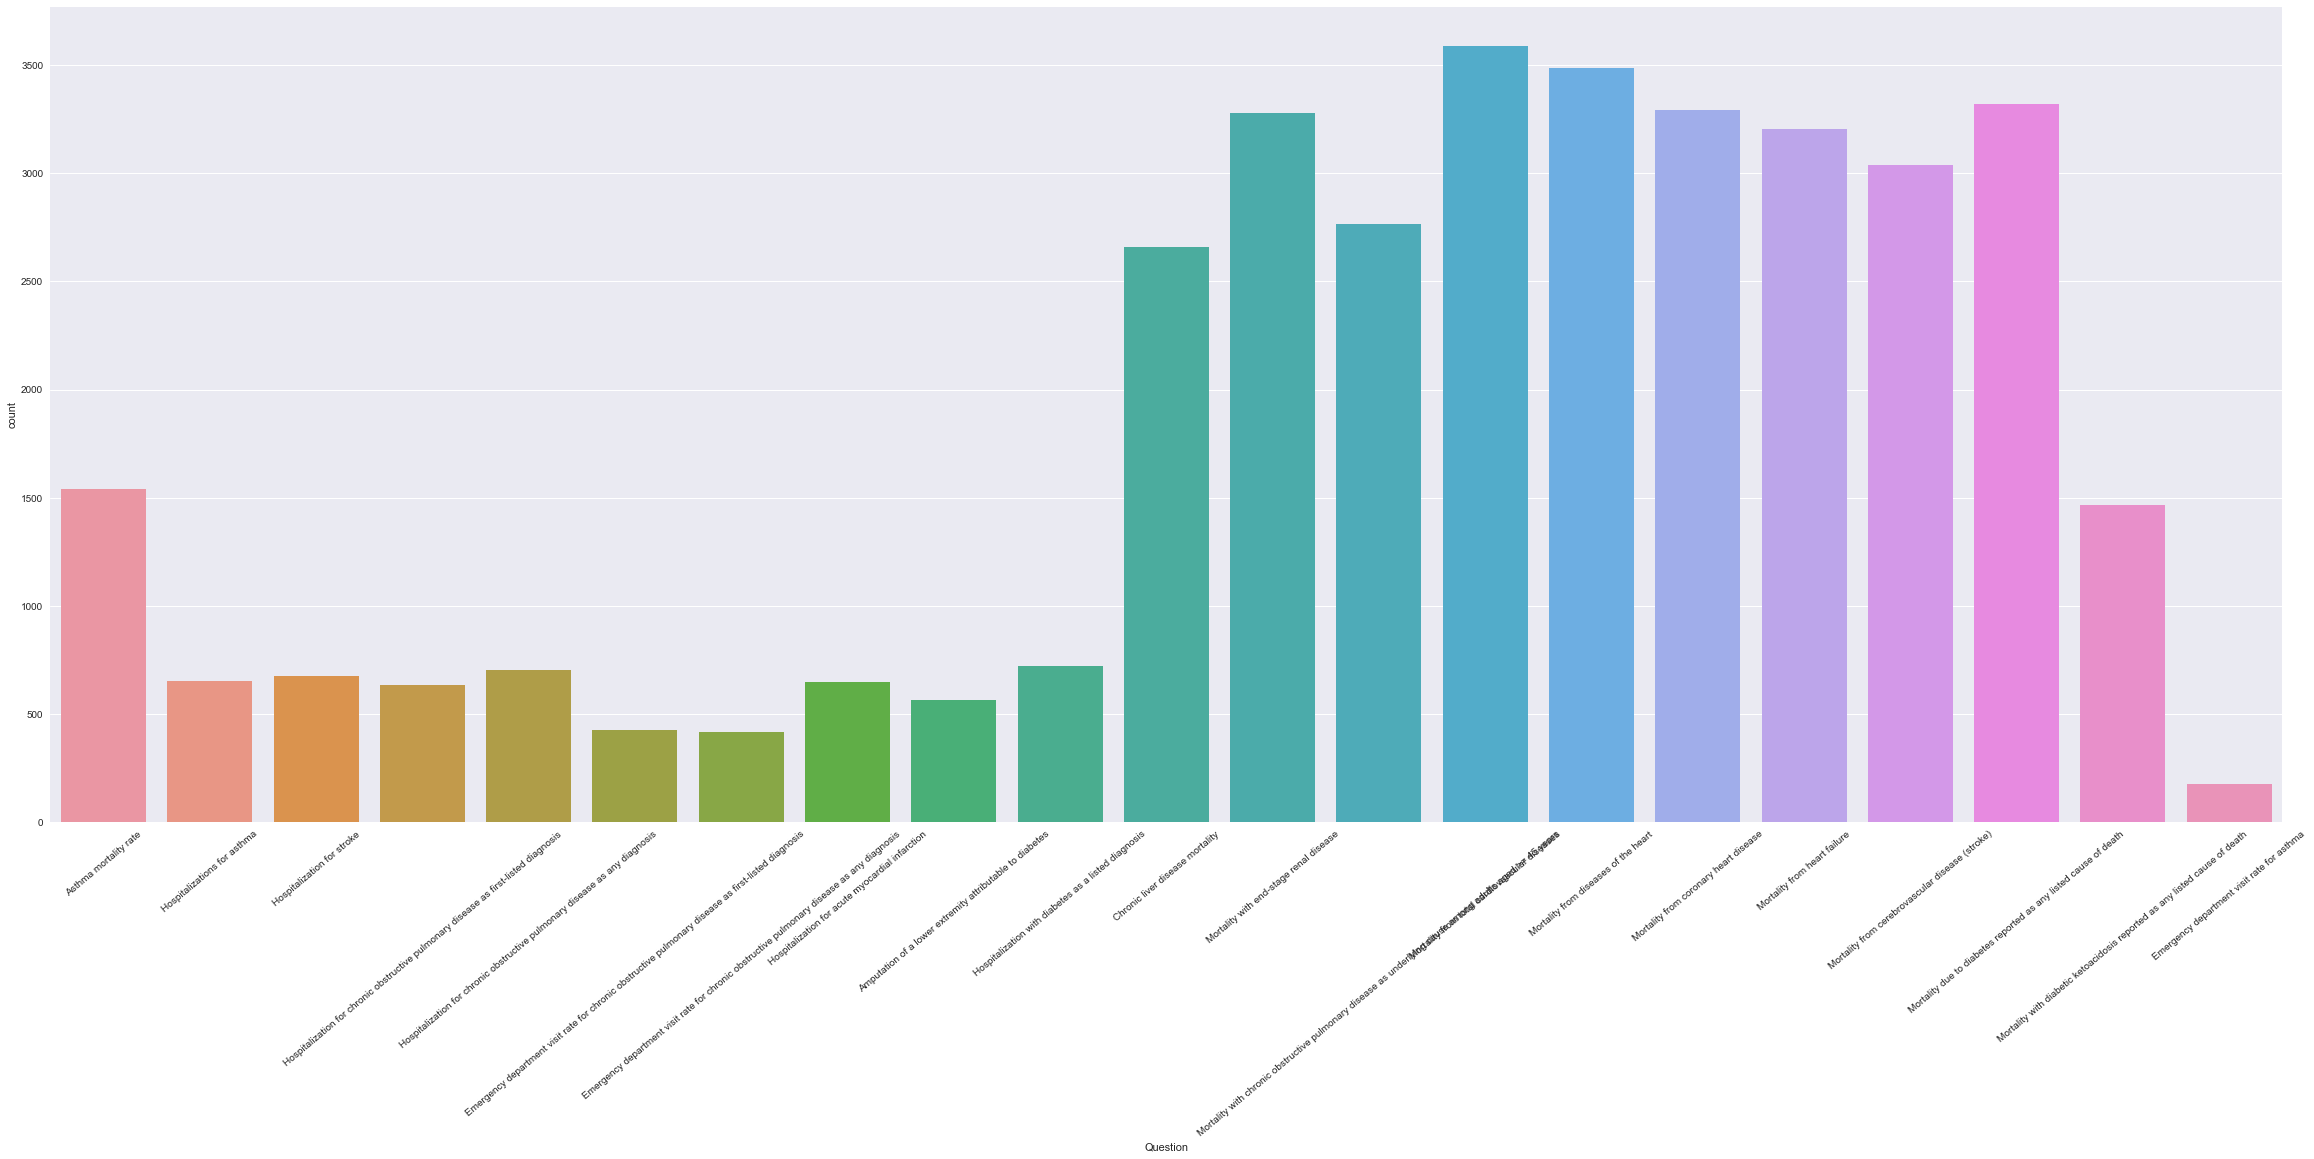

In [10]:
#visualizing topics
sns.set(rc={'figure.figsize':(40,15)})
sns.countplot(x='Question', data = Analyzed_data)
plt.xticks(rotation = 40)

## Cardiovascular and Diabetes Disease are the highest reasons for mortality

What is the overall Mortality from total cardiovascular diseases in the U.S.?

In [11]:
## lets explore Cardiovascular data
df_cardio = Analyzed_data[Analyzed_data['Topic']=='Cardiovascular Disease']
df_cardio.head()

,Unnamed: 0,YearEnd,LocationAbbr,LocationDesc,Topic,Question,Response,DataValueUnit,DataValueType,DataValue,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation
600,70787,2013,AZ,Arizona,Cardiovascular Disease,Hospitalization for stroke,,"cases per 10,000",Age-adjusted Rate,17.22,,16.93,17.52,Overall,Overall,"(34.865970280000454, -111.76381127699972)"
631,70827,2013,AR,Arkansas,Cardiovascular Disease,Hospitalization for stroke,,"cases per 10,000",Age-adjusted Rate,23.12,,22.36,23.87,Gender,Male,"(34.74865012400045, -92.27449074299966)"
651,70863,2013,AR,Arkansas,Cardiovascular Disease,Hospitalization for stroke,,"cases per 10,000",Age-adjusted Rate,22.05,,21.55,22.54,Overall,Overall,"(34.74865012400045, -92.27449074299966)"
1032,71594,2013,IA,Iowa,Cardiovascular Disease,Hospitalization for stroke,,"cases per 10,000",Age-adjusted Rate,8.05,,5.86,10.24,Race/Ethnicity,Hispanic,"(42.46940091300047, -93.81649055599968)"
1192,71993,2013,IA,Iowa,Cardiovascular Disease,Hospitalization for stroke,,"cases per 10,000",Age-adjusted Rate,18.14,,17.49,18.78,Gender,Male,"(42.46940091300047, -93.81649055599968)"


In [14]:
Annual_cardio_incidence = df_cardio[(df_cardio.Topic == 'Cardiovascular Disease') & 
                          (df_cardio.StratificationCategory1 == "Overall") & 
                          (df_cardio.DataValueType == 'Crude Rate')]
Annual_cardio_incidence.head()

,Unnamed: 0,YearEnd,LocationAbbr,LocationDesc,Topic,Question,Response,DataValueUnit,DataValueType,DataValue,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation
1667,73053,2013,AR,Arkansas,Cardiovascular Disease,Hospitalization for stroke,,"cases per 10,000",Crude Rate,25.78,,25.21,26.36,Overall,Overall,"(34.74865012400045, -92.27449074299966)"
1675,73061,2013,AZ,Arizona,Cardiovascular Disease,Hospitalization for stroke,,"cases per 10,000",Crude Rate,19.78,,19.44,20.12,Overall,Overall,"(34.865970280000454, -111.76381127699972)"
1683,73070,2013,CO,Colorado,Cardiovascular Disease,Hospitalization for stroke,,"cases per 10,000",Crude Rate,14.41,,14.09,14.73,Overall,Overall,"(38.843840757000464, -106.13361092099967)"
1691,73080,2013,FL,Florida,Cardiovascular Disease,Hospitalization for stroke,,"cases per 10,000",Crude Rate,26.91,,26.68,27.13,Overall,Overall,"(28.932040377000476, -81.92896053899966)"
1698,73089,2013,HI,Hawaii,Cardiovascular Disease,Hospitalization for stroke,,"cases per 10,000",Crude Rate,20.75,,20.00,21.50,Overall,Overall,"(21.304850435000446, -157.85774940299973)"


In [15]:
cardio_2014 = Annual_cardio_incidence[Annual_cardio_incidence["YearEnd"]==2014]


In [16]:
cardio_mortality = cardio_2014[cardio_2014["Question"]=='Mortality from total cardiovascular diseases']

In [19]:
AI = cardio_mortality[['LocationAbbr','LocationDesc','DataValue']].sort_values(by='DataValue')
AI.head()

,LocationAbbr,LocationDesc,DataValue
8794,AK,Alaska,137.8
9109,UT,Utah,155.5
8833,CO,Colorado,176.2
8959,MN,Minnesota,197.8
8825,CA,California,204.2


Use a built in Pandas function (nlargest) to plot the 15 states with the highest Mortality from total cardiovascular diseases

In [20]:
#merge_I_C.loc[:,'DataValue']= merge_I_C.DataValue
#merge_I_C_headeraxis = merge_I_C.nlargest(10,'DataValue').plot(x='LocationAbbr', y='DataValue', kind='bar',figsize=(15,10),legend=True, fontsize=20)
#plt.savefig("Resources/Cardio_dist.png")

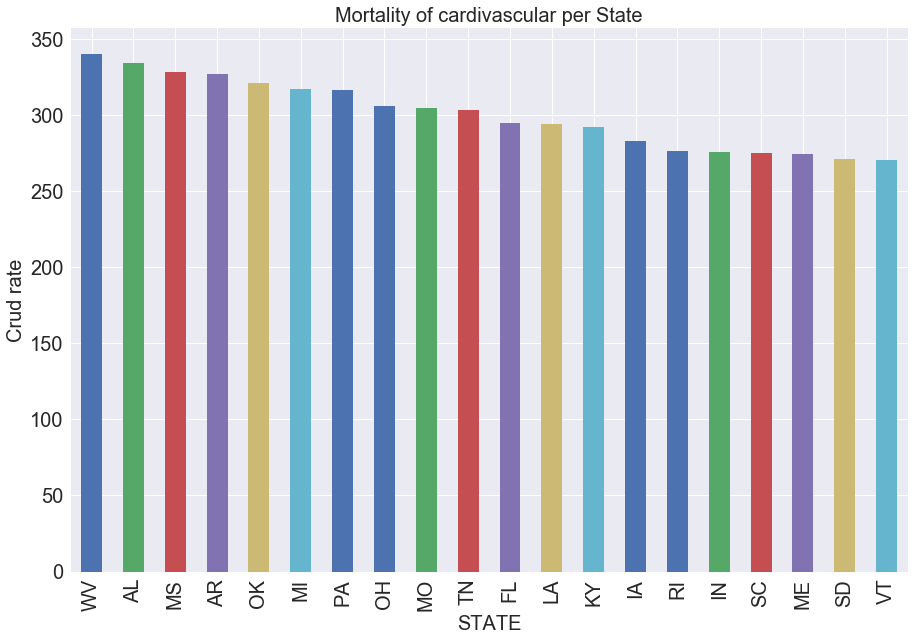

In [44]:
AI.loc[:,'DataValue']= AI.DataValue
AIaxis = AI.nlargest(20,'DataValue').plot(x='LocationAbbr', y='DataValue', kind='bar',figsize=(15,10),legend=False, fontsize=20)
plt.title('Mortality of cardivascular per State',fontsize=20)
plt.xlabel('STATE',fontsize=20)
plt.ylabel('Crud rate',fontsize=20)
plt.savefig("Resources/Cardio_distributionf.png")

#### how cardio is related with income?

In [22]:
#AI.DataValue=AI.loc[:,'Datavalue']
#AIaxis = AI.nlargest(15,'DataValue').plot(x='LocationAbbr', y='DataValue', kind='bar')
#AIaxis.set_ylabel='test'
#plt.show()
#plt.savefig("Resources/Cardio_prev.png")

In [23]:
econ_df.head()

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,36611,251,10894952,909156,30.771450,-88.079697,38773,30506,33101,1638.260513
1,1011010,1,Alabama,AL,Barbour County,Louisville,Clio city,City,place,36048,334,26070325,23254,31.708516,-85.611039,37725,19528,43789,258.017685
2,1011020,1,Alabama,AL,Shelby County,Columbiana,Columbiana city,City,place,35051,205,44835274,261034,33.191452,-86.615618,54606,31930,57348,926.031000
3,1011030,1,Alabama,AL,Mobile County,Satsuma,Creola city,City,place,36572,251,36878729,2374530,30.874343,-88.009442,63919,52814,47707,378.114619
4,1011040,1,Alabama,AL,Mobile County,Dauphin Island,Dauphin Island,Town,place,36528,251,16204185,413605152,30.250913,-88.171268,77948,67225,54270,282.320328


In [24]:
Mean_income_state=econ_df['Mean'].groupby([econ_df['State_Name']]).mean()
Mean_income_state.head()

State_Name
Alabama       53612.925856
Alaska        77670.209524
Arizona       62578.071313
Arkansas      52060.361765
California    78126.737805
Name: Mean, dtype: float64

In [25]:
Mean_income_state.to_csv("Resources/STATE_Mean_Income.csv")

In [26]:
STATE_header=pd.read_csv("Resources/STATE_Mean_Income.csv",header=None)
STATE_header.columns=["LocationDesc","Income"]


In [27]:
STATE_header.head()

,LocationDesc,Income
0,Alabama,53612.925856
1,Alaska,77670.209524
2,Arizona,62578.071313
3,Arkansas,52060.361765
4,California,78126.737805


In [28]:
#STATE_header.loc[:,'Income']= STATE_header.Income
#STATE_headeraxis = STATE_header.nlargest(10,'Income').plot(x='LocationDesc', y='Income', kind='bar',figsize=(15,10),legend=True, fontsize=20)
#plt.savefig("Resources/Income_dist.png")

In [29]:
#STATE_header.plot(x='LocationDesc',y='Income')
#AI.plot(x='LocationAbbr',y='DataValue')
#plt.savefig("Resources/Income_VS_Chronic.png")

In [30]:
merge_I_C = pd.merge(STATE_header,AI,on="LocationDesc")

In [31]:
merge_I_C.head()

,LocationDesc,Income,LocationAbbr,DataValue
0,Alabama,53612.925856,AL,334.6
1,Alaska,77670.209524,AK,137.8
2,Arizona,62578.071313,AZ,215.2
3,Arkansas,52060.361765,AR,327.3
4,California,78126.737805,CA,204.2


In [32]:
merge_I_C.to_csv("Resources/merge_crude_Income.csv")

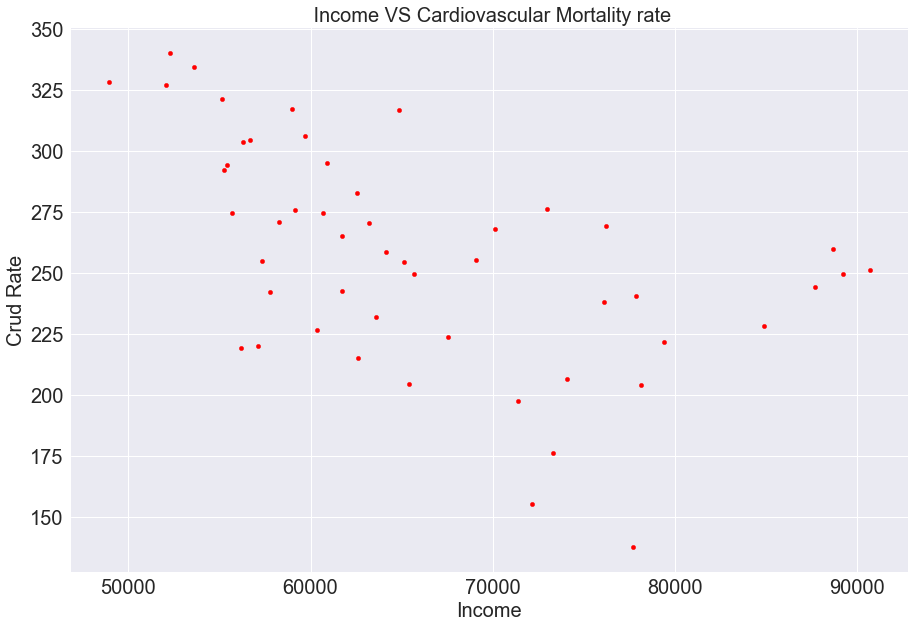

In [43]:
merge_I_C.plot(kind='scatter',x='Income',y='DataValue',color='red',figsize=(15,10),legend=True, fontsize=20)
plt.title(' Income VS Cardiovascular Mortality rate',fontsize=20)
plt.xlabel('Income',fontsize=20)
plt.ylabel('Crud Rate',fontsize=20)
plt.savefig("Resources/Income_VS_Mortlity.png")
plt.show()

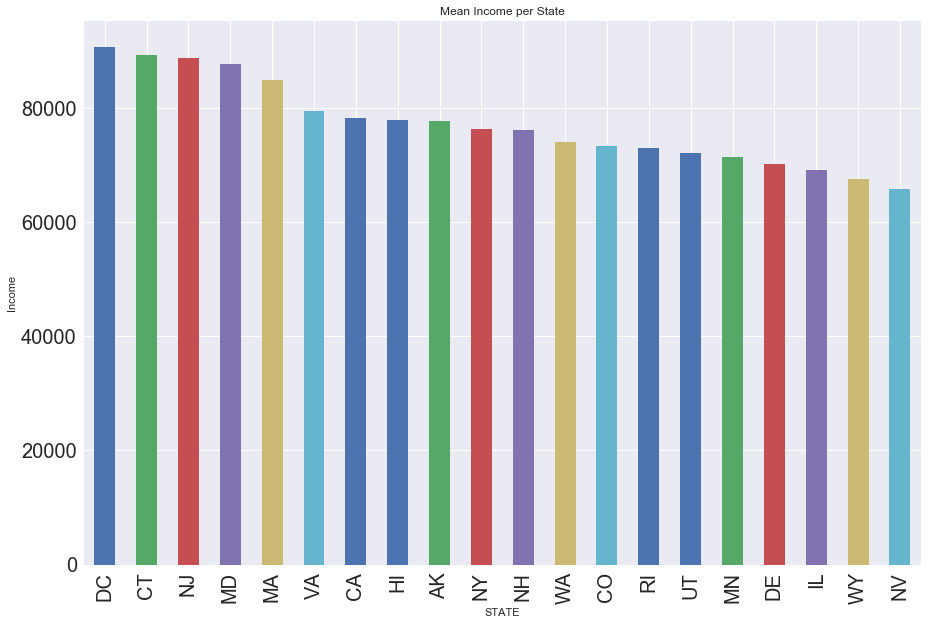

In [45]:
merge_I_C.loc[:,'Income']= merge_I_C.Income
merge_I_C_headeraxis = merge_I_C.nlargest(20,'Income').plot(x='LocationAbbr', y='Income', kind='bar',figsize=(15,10),legend=False, fontsize=20)
plt.title('Mean Income per State')
plt.xlabel('STATE')
plt.ylabel('Income')
plt.savefig("Resources/Income_distF.png")